# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from time import time
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_recall_curve, classification_report, f1_score, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df_train = pd.read_csv('train_data.txt')
df_train.head()

,ID,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


# Part I: EDA

## Columns and Details

In [3]:
print(df_train.columns)

Index(['ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86'],
      dtype='object')


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5822 non-null   int64
 1   1       5822 non-null   int64
 2   2       5822 non-null   int64
 3   3       5822 non-null   int64
 4   4       5822 non-null   int64
 5   5       5822 non-null   int64
 6   6       5822 non-null   int64
 7   7       5822 non-null   int64
 8   8       5822 non-null   int64
 9   9       5822 non-null   int64
 10  10      5822 non-null   int64
 11  11      5822 non-null   int64
 12  12      5822 non-null   int64
 13  13      5822 non-null   int64
 14  14      5822 non-null   int64
 15  15      5822 non-null   int64
 16  16      5822 non-null   int64
 17  17      5822 non-null   int64
 18  18      5822 non-null   int64
 19  19      5822 non-null   int64
 20  20      5822 non-null   int64
 21  21      5822 non-null   int64
 22  22      5822 non-null   int64
 23  23      5822 

There is no null values in the dataset

In [5]:
## Data dimensions
df_train.shape

(5822, 87)

In [6]:
## Summary stats on columns
df_train.describe()

,ID,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2911.500000,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,1680.810965,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1456.250000,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2911.500000,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4366.750000,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5822.000000,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [7]:
# function to get unique count per column in a data frame
def count_unique_values(df):
    
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']          # Count total number of non-null values
    
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))

In [8]:
# get count of unique values for dataframe
count_unique_values(df_train)

,ID,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
Total,5822,5822,5822,5822,5822,5822,5822,5822,5822,5822,...,5822,5822,5822,5822,5822,5822,5822,5822,5822,5822
Uniques,5822,40,9,5,6,10,10,10,6,10,...,2,2,3,7,2,3,4,3,3,2


We observe that all the features are categorical values

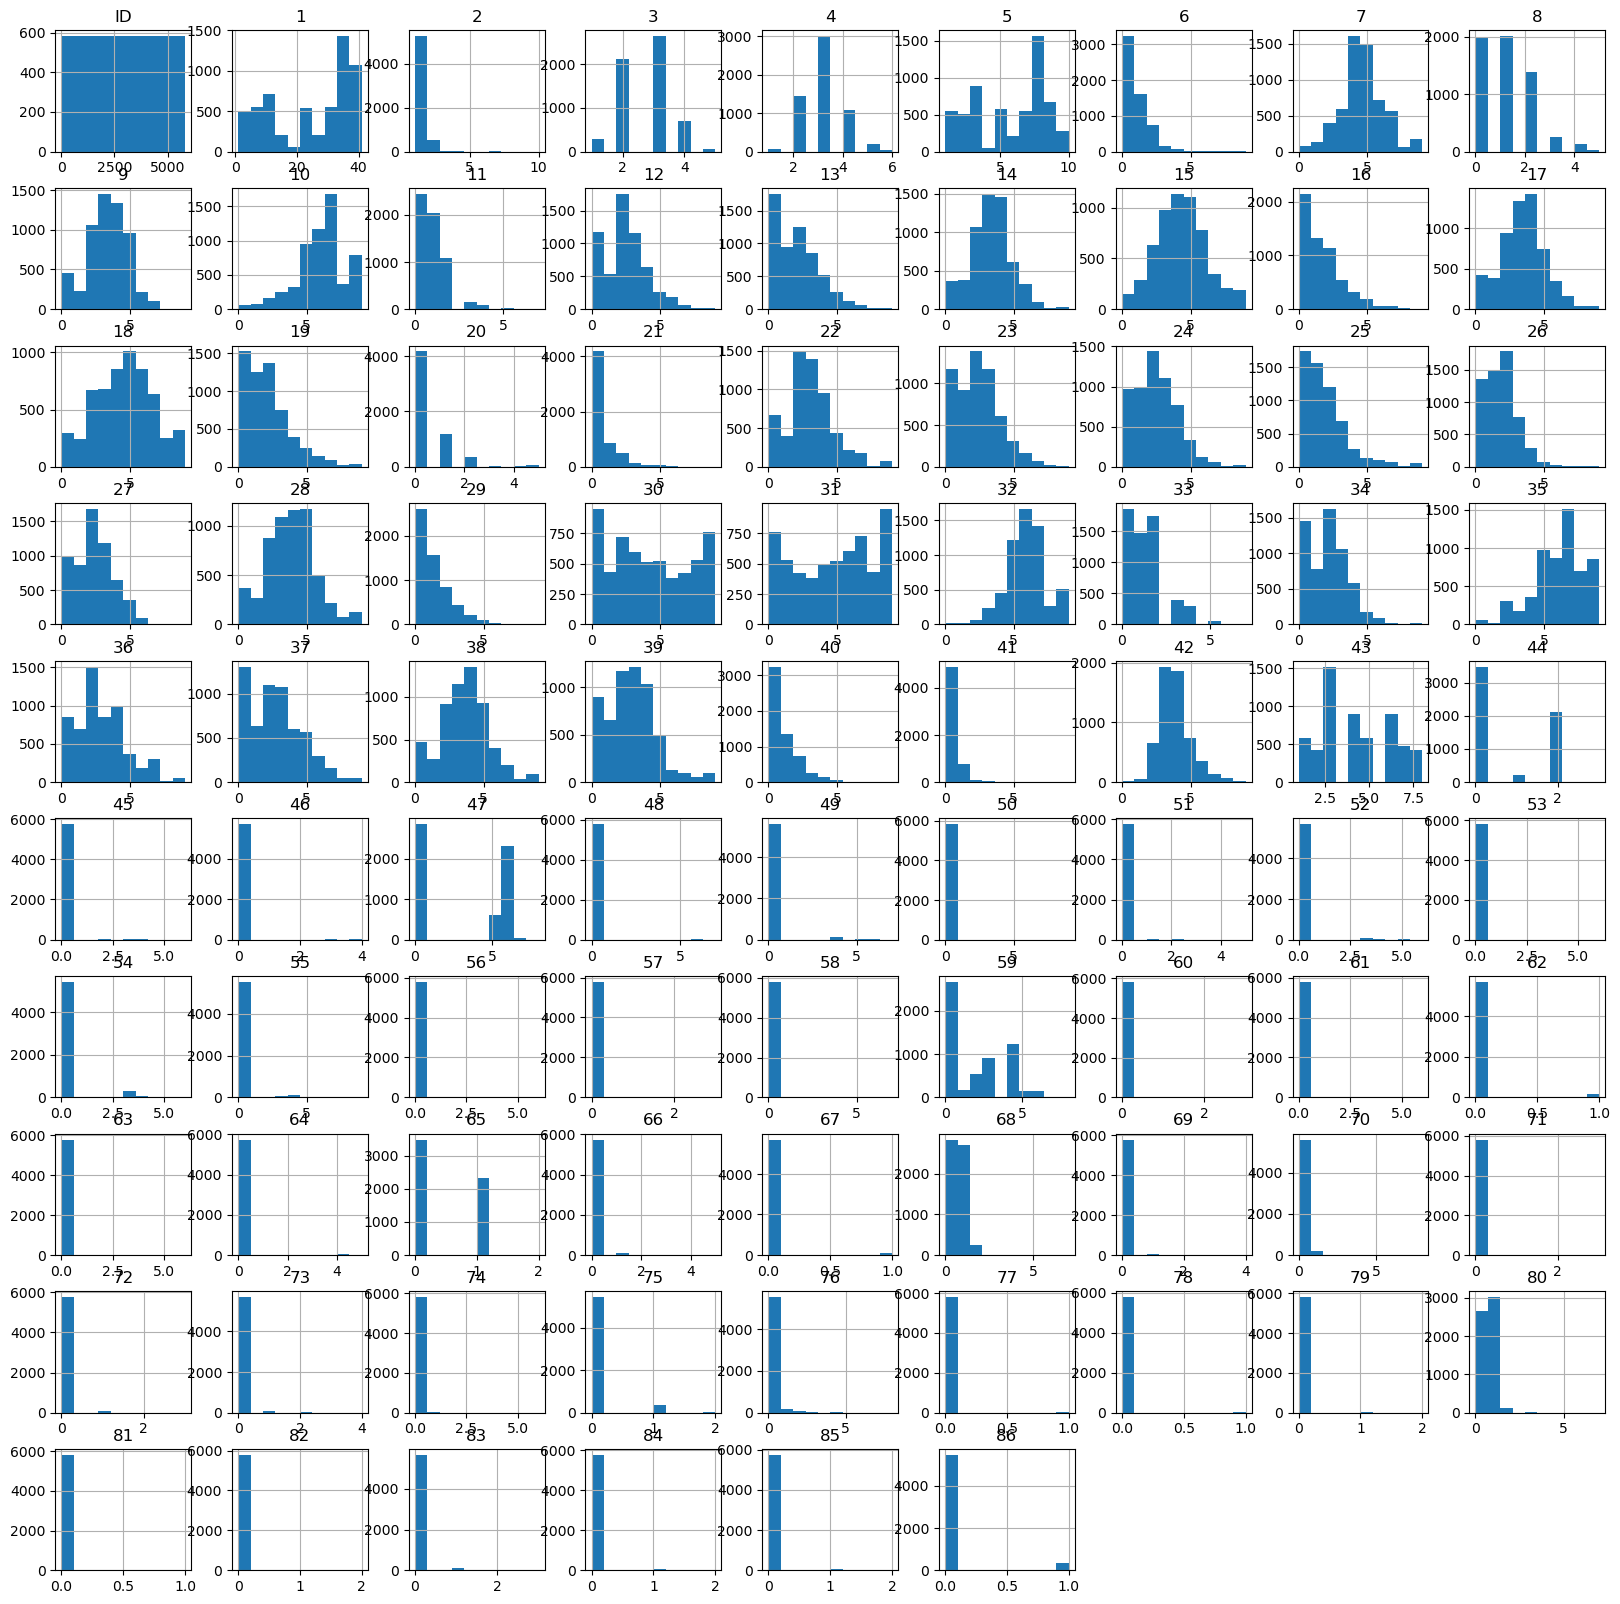

In [9]:
# plot the histogram of each parameter
df_train.hist(figsize = (20, 20))
plt.show()

## Feature Explorations

## Target Variable distribution studies

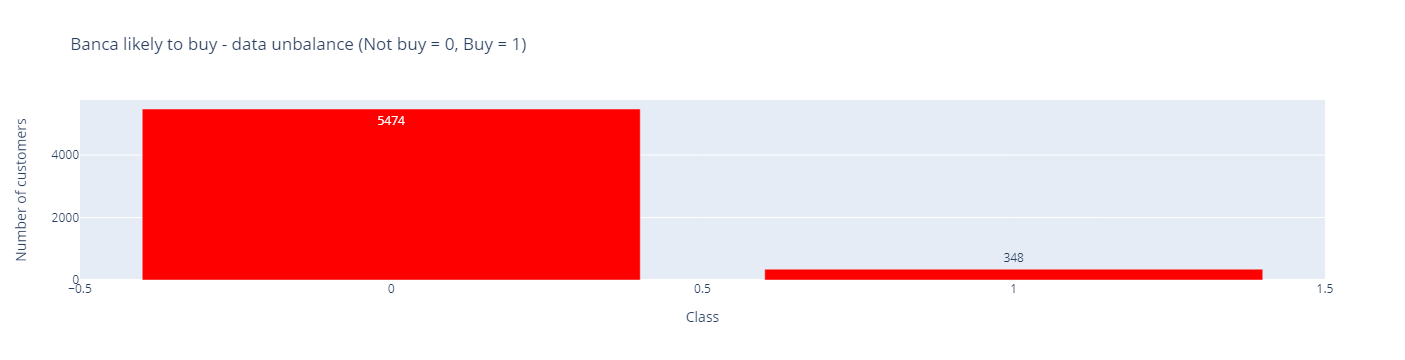

In [10]:
df_train.rename(columns={'86':'Class'}, inplace=True)
temp = df_train['Class'].value_counts()
df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

plt.close("all")

trace = go.Bar(
    x = df['Class'], y = df['values'],
    name = "Banca likely to buy - data unbalance (Not buy = 0, Buy = 1)",
    marker = dict(color="Red"),
    text = df['values']
)
data_fig = [trace]
layout = dict(title = "Banca likely to buy - data unbalance (Not buy = 0, Buy = 1)", 
             xaxis = dict(title = 'Class', showticklabels=True),
             yaxis = dict(title = 'Number of customers'),
             hovermode = 'closest', width=600
             )
fig = dict(data=data_fig, layout=layout)
iplot(fig, filename='Class')

In [11]:
# determine the number of BUY or NOT BUY manu cases
not_buy = df_train[df_train['Class'] == 0]
buy = df_train[df_train['Class'] == 1]

outlier_fraction = len(buy) / float(len(not_buy))

# ------------------------------
print('outlier_fraction: {}' .format(outlier_fraction))
print('Not buy cases: {}' .format(len(not_buy)))
print('Buy cases: {}' .format(len(buy)))

outlier_fraction: 0.06357325538911217
Not buy cases: 5474
Buy cases: 348


## Checking Separation of classes with TSNA Plot

(5822, 86) (5822, 1)
TSNA done in 72.381s.
(5822, 3)
(5822, 3)


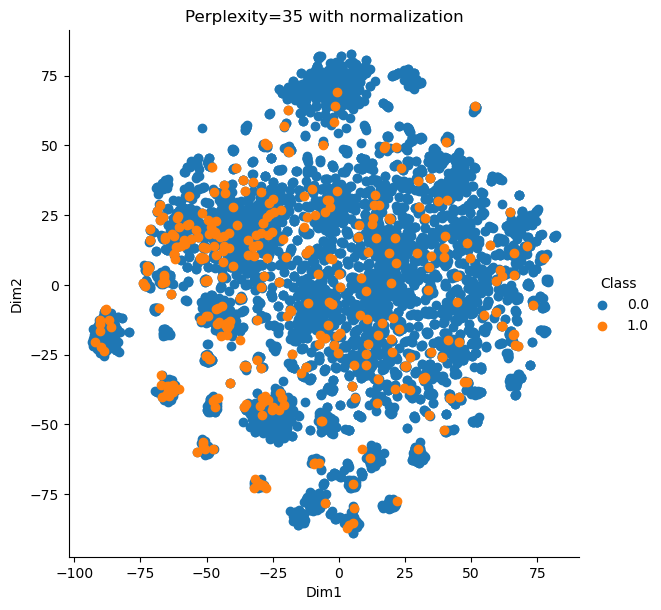

In [12]:
sample_features = df_train.sample(5822)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:, np.newaxis]
sample_features = sample_features.drop('Class', axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape, sample_class.shape)
model = TSNE(n_components=2, random_state=0,perplexity=35)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNA done in %0.3fs." % (time() - t0))

final_data = np.concatenate((embedded_data, sample_class), axis=1)
print(final_data.shape)

final_data = np.concatenate((embedded_data, sample_class), axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data, columns=['Dim1', 'Dim2', 'Class'])

sns.FacetGrid(newdf, hue='Class', size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('Perplexity=35 with normalization')
plt.show()

# Part II: Feature Selection

In [17]:
## Feature selection using Chi-Square Test of Independence
X = df_train.drop('Class', axis=1)
y = df_train['Class']

In [18]:
# Apply sklearn ch2
ch2c = SelectKBest(score_func=chi2,k=10)
ch2c.fit(X, y)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,3)},index=X.columns)
features_score_pvalue.nlargest(n=70,columns="Score")

,Score,P_Value
47,380.691708,0.000
ID,215.768449,0.000
61,191.696446,0.000
1,190.696878,0.000
59,100.332586,0.000
...,...,...
56,1.721240,0.190
3,1.715433,0.190
48,1.456682,0.227
49,0.847004,0.357


In [19]:
features_score_pvalue = features_score_pvalue[features_score_pvalue["P_Value"]<0.50]
selected_cols = features_score_pvalue.index.values.tolist()

In [20]:
X_select = df_train[selected_cols]
y_select = df_train["Class"]

# Part II: Split original data set for testing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in sss.split(X_select, y_select):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [   0    1    2 ... 5818 5819 5821] Test: [   7    8   18 ... 5812 5816 5820]
Train: [   0    1    2 ... 5819 5820 5821] Test: [   3    4   12 ... 5792 5794 5808]
Train: [   0    3    4 ... 5819 5820 5821] Test: [   1    2    9 ... 5810 5814 5815]
Train: [   0    1    2 ... 5817 5820 5821] Test: [  19   35   37 ... 5811 5818 5819]
Train: [   1    2    3 ... 5818 5819 5820] Test: [   0    5    6 ... 5813 5817 5821]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.94031773 0.05968227]
[0.93986254 0.06013746]


# Part III: Build a simple model

## Implement simple classifiers

In [22]:
# Predict
model = LogisticRegression()
#model = DecisionTreeClassifier()
# Train the model
model.fit(original_Xtrain, original_ytrain)
preds = model.predict(original_Xtest)

In [23]:
classifier_o = LogisticRegression()
classifier_o.fit(original_Xtrain, original_ytrain)
print(classification_report(original_ytest, classifier_o.predict(original_Xtest)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1094
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1164
   macro avg       0.47      0.50      0.48      1164
weighted avg       0.88      0.94      0.91      1164



In [72]:
# Calculate the precision, recall, f5 given the y_test and predictions
# Use beta=5 which means we think the cost of positive class is 5 times of negative class
accuracy = accuracy_score(original_ytest, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(original_ytest, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(original_ytest, preds)
print(f"Accuracy is: {accuracy:.2f}")
print(f"Precision is: {precision:.3f}")
print(f"Recall is: {recall:.2f}")
print(f"Fscore is: {fbeta:.2f}")
print(f"AUC is: {auc:.2f}")

Accuracy is: 0.94
Precision is: 0.000
Recall is: 0.00
Fscore is: 0.00
AUC is: 0.50


# Part III: SMOTE Implementation for OverSampling with CV for LogisticsRegression

## Check for class imbalance

In [24]:
# Check for class Imbalance
# The classes are heavily skewed
print('Not Buy', round(df_train['Class'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('Buy', round(df_train['Class'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

Not Buy 94.02 % of the dataset
Buy 5.98 % of the dataset


In [25]:
print(df_train['Class'].value_counts()[1])

348


Text(0.5, 1.0, 'Class Distributions \n (0: Not Buy || 1: Buy)')

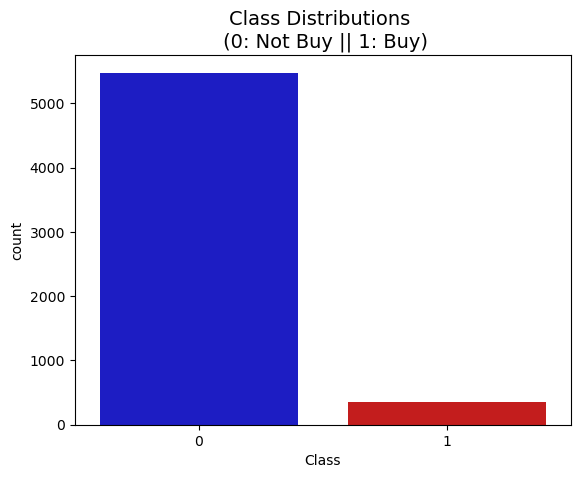

In [26]:
# Check Visual for the class distribution
colors = ['#0101DF', '#DF0101']
sns.countplot('Class', data=df_train, palette=colors)
plt.title('Class Distributions \n (0: Not Buy || 1: Buy)', fontsize=14)

## Model train

In [27]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
# Instantiate LR
log_reg_sm = LogisticRegression()
# LR parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Instantiate Grid Search CV
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# Implementing SMOTE Technique
# Cross Validating the right way
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = grid_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
# Get the MEAN Values of the CV accuracies
#-------------------------------------------------------
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7750017287240173
precision: 0.11124484380525752
recall: 0.39564935064935064
f1: 0.17310939039621404
---------------------------------------------------------------------------------------------------------------------------------------


## Model Test

### Classification report on test data

In [28]:
labels = ['No Buy', 'Buy']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

      No Buy       0.96      0.74      0.84      1094
         Buy       0.11      0.51      0.19        70

    accuracy                           0.73      1164
   macro avg       0.54      0.63      0.51      1164
weighted avg       0.91      0.73      0.80      1164



### Precision and Recall Studies

In [29]:
from sklearn.metrics import average_precision_score
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.14


### Plot Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve: \n Average Precision-Recall Score =0.14')

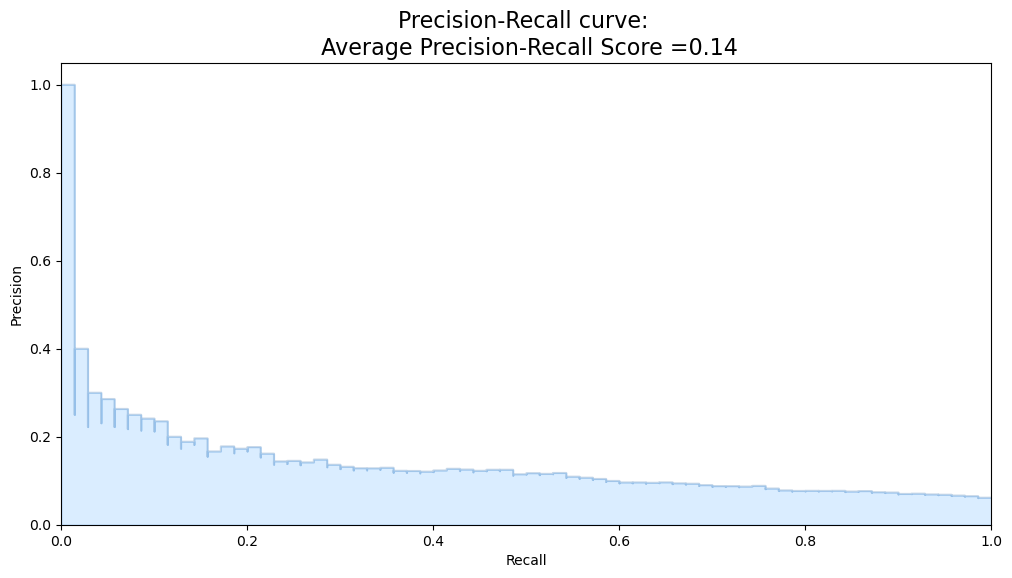

In [30]:
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(original_ytest, y_score)
plt.step(recall, precision, color='#004a93', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='#48a6ff')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(average_precision), fontsize=16)

### Confusion Matrix

<AxesSubplot:>

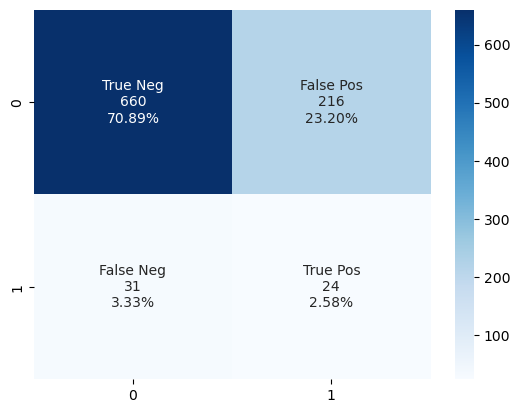

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = best_est.predict(original_Xtrain[test])
# Confusion Matrix
log_reg_cf = confusion_matrix(original_ytrain[test], y_pred_log_reg)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in log_reg_cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
log_reg_cf.flatten()/np.sum(log_reg_cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(log_reg_cf, annot=labels, fmt='', cmap='Blues')

# Part V: Predict

In [32]:
X_pre = pd.read_csv('test_data.txt')
X_pre.head()

,ID,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,2,0,0,0,1,0,0,0,0,0
2,3,39,1,3,3,9,1,4,2,3,...,1,0,0,0,1,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,0,1,0,0,0,0,0


In [33]:
y_pre = best_est.predict(X_pre)

In [38]:
df_y_pre = pd.DataFrame(y_pre, columns=['predict'])
df_y_pre.head()

,predict
0,0
1,1
2,0
3,0
4,0


In [39]:
df_out = pd.merge(X_pre,df_y_pre,how = 'left',left_index = True, right_index = True)
df_out.head()

,ID,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,predict
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,0,0,0,1,0,0,0,0,0,1
2,3,39,1,3,3,9,1,4,2,3,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,1,0,0,0,0,0,0


In [42]:
df_out.loc[lambda df: df['predict'] == 1]['ID'].to_csv('id_manu_predicted.csv')

In [28]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [29]:
# Create a SMOTE sampler
rs = 123
smote_sampler = SMOTE(random_state = rs)

In [36]:
# Resample training data using SMOTE
X_smo, y_smo = smote_sampler.fit_resample(original_Xtrain, original_ytrain)

<AxesSubplot:>

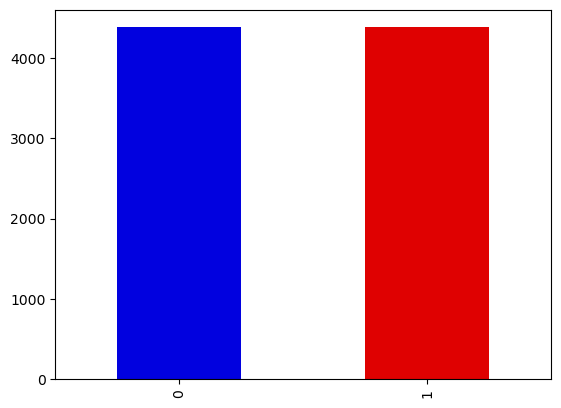

In [40]:
# Visualize classes
y_smo.value_counts().plot.bar(color=['#0101DF', '#DF0101'])